In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('./base para curva de valor ideia livro de pontos.CSV', sep=';')

In [88]:
df

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,EXCEL,10,10,10,10,2,0,0
1,LIVRO COMUM,4,6,6,8,2,2,0
2,PONTO MAIS,6,2,4,2,4,6,0
3,CLICKUP,8,4,8,6,6,4,5
4,NOSSO APP,0,0,2,2,7,7,10


In [89]:
df_direto = df[(df['APPS'] == 'PONTO MAIS' ) | (df['APPS'] == 'CLICKUP')]
df_indireto = df[(df['APPS'] == 'LIVRO COMUM' ) | (df['APPS'] == 'EXCEL')]

In [90]:
df_direto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
2,PONTO MAIS,6,2,4,2,4,6,0
3,CLICKUP,8,4,8,6,6,4,5


In [91]:
df_media_direto = pd.DataFrame(columns=['APPS', 'PREÇO','CONFUSÕES', 'ESTRESSE', 'PROBLEMAS JURÍDICOS', 'NÚMERO DE CA', 'AGILIDADE','FOCO PARA POUCOS FUNCIONÁRIOS'])

In [92]:
df_media_direto.loc[0, "PREÇO"] = df_direto["PREÇO"].mean()
df_media_direto.loc[0, "CONFUSÕES"] = df_direto["CONFUSÕES"].mean()
df_media_direto.loc[0, "ESTRESSE"] = df_direto['ESTRESSE'].mean()
df_media_direto.loc[0, "PROBLEMAS JURÍDICOS"] = df_direto['PROBLEMAS JURÍDICOS'].mean()
df_media_direto.loc[0, "NÚMERO DE CA"] = df_direto['NÚMERO DE CA'].mean()
df_media_direto.loc[0, "AGILIDADE"] = df_direto['AGILIDADE'].mean()
df_media_direto.loc[0, "FOCO PARA POUCOS FUNCIONÁRIOS"] = df_direto['FOCO PARA POUCOS FUNCIONÁRIOS'].mean()
df_media_direto.loc[0, df_media_direto.columns[0]] = "Direto"

In [93]:
df_media_direto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,Direto,7.0,3.0,6.0,4.0,5.0,5.0,2.5


In [94]:
df_indireto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,EXCEL,10,10,10,10,2,0,0
1,LIVRO COMUM,4,6,6,8,2,2,0


In [95]:
df_media_indireto = pd.DataFrame(columns=['APPS', 'PREÇO','CONFUSÕES', 'ESTRESSE', 'PROBLEMAS JURÍDICOS', 'NÚMERO DE CA', 'AGILIDADE','FOCO PARA POUCOS FUNCIONÁRIOS'])

In [96]:
df_media_indireto.loc[0, "PREÇO"] = df_indireto["PREÇO"].mean()
df_media_indireto.loc[0, "CONFUSÕES"] = df_indireto["CONFUSÕES"].mean()
df_media_indireto.loc[0, "ESTRESSE"] = df_indireto['ESTRESSE'].mean()
df_media_indireto.loc[0, "PROBLEMAS JURÍDICOS"] = df_indireto['PROBLEMAS JURÍDICOS'].mean()
df_media_indireto.loc[0, "NÚMERO DE CA"] = df_indireto['NÚMERO DE CA'].mean()
df_media_indireto.loc[0, "AGILIDADE"] = df_indireto['AGILIDADE'].mean()
df_media_indireto.loc[0, "FOCO PARA POUCOS FUNCIONÁRIOS"] = df_indireto['FOCO PARA POUCOS FUNCIONÁRIOS'].mean()
df_media_indireto.loc[0, df_media_indireto.columns[0]] = "Indireto"

In [97]:
df_media_indireto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,Indireto,7.0,8.0,8.0,9.0,2.0,1.0,0.0


In [98]:
df_media_direto.loc[0, df.columns[0]] = "Direto"
df_media_direto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,Direto,7.0,3.0,6.0,4.0,5.0,5.0,2.5


In [99]:
df_indireto

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,EXCEL,10,10,10,10,2,0,0
1,LIVRO COMUM,4,6,6,8,2,2,0


In [100]:
# quero unir 2 dataframe
df_new = pd.concat([df_media_direto, df_media_indireto, df[(df['APPS'] == 'NOSSO APP' )]], axis=0)
df_new

,APPS,PREÇO,CONFUSÕES,ESTRESSE,PROBLEMAS JURÍDICOS,NÚMERO DE CA,AGILIDADE,FOCO PARA POUCOS FUNCIONÁRIOS
0,Direto,7.0,3.0,6.0,4.0,5.0,5.0,2.5
0,Indireto,7.0,8.0,8.0,9.0,2.0,1.0,0.0
4,NOSSO APP,0,0,2,2,7,7,10


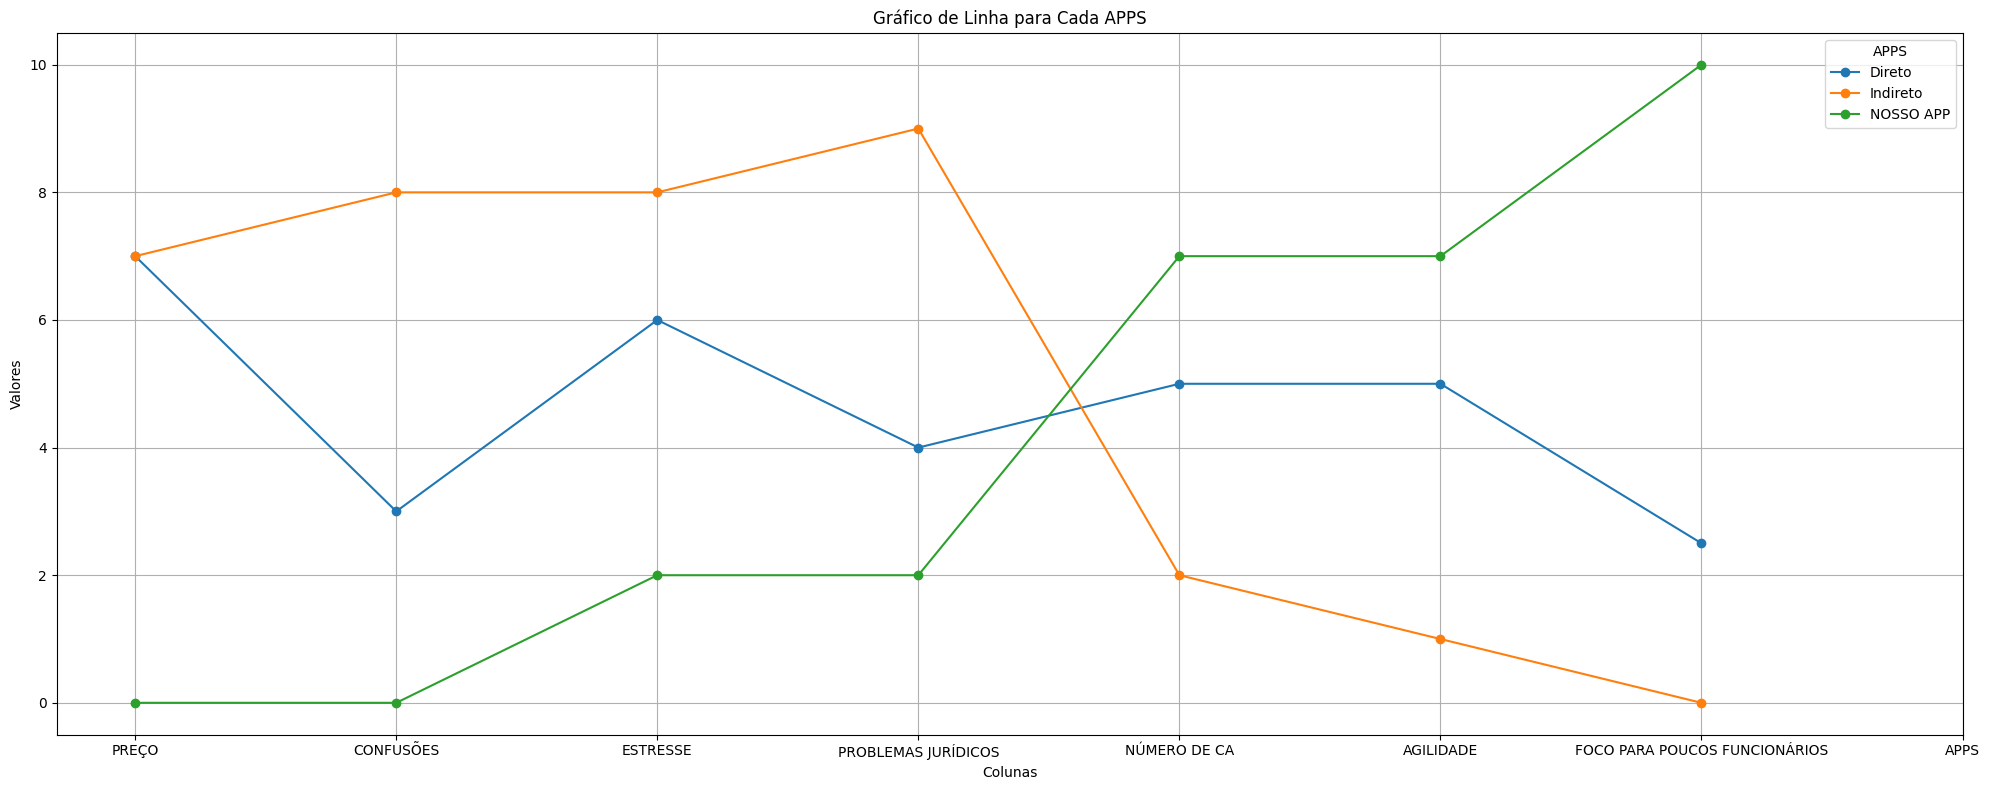

In [101]:
# Selecionando os aplicativos como índice
df_new.set_index('APPS', inplace=True)

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(20, 8))

for app in df_new.index:
    ax.plot(df_new.columns, df_new.loc[app], marker='o', label=app)

ax.set_title('Gráfico de Linha para Cada APPS')
ax.set_xlabel('Colunas')
ax.set_ylabel('Valores')
ax.set_xticks(df.columns)
ax.legend(title='APPS')
ax.grid(True)
plt.xticks()
plt.tight_layout()

